**1.Pengenalan**

**1.a.Latar belakang**

Analisis dilatar belakangi oleh kasus penyakit jantung yang memiliki persentase kematian cukup tinggi yaitu 18,9% untuk ras penduduk Asia (CDC, 2020). Oleh karena itu, diperlukan model machine learning dengan mengenali gejala dari beberapa parameter klinis untuk memprediksi pasien yang terkena penyakit jantung.

**1.b.Dataset**

Dataset yang digunakan terdiri dari 14 atribut. Data terdiri dari 1025 baris dan 14 kolom (atribut). sumber data berasal dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv .
atribut dari data antara lain:

*   age: The person's age in years
*   sex: The person's sex (1 = male, 0 = female)
*   cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
*   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
*   chol: The person's cholesterol measurement (mg/dl)
*   fbs: fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
*   restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
*   thalach: detak jantung maksimum pasien
*   exang: Exercise induced angina (1 = yes; 0 = no)
*   oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
*   slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
*   ca: The number of major vessels (0-3)
*   thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
*   target: Heart disease (0 = no, 1 = yes)

**1.c.Objektif**

Membuat model machine learning untuk memprediksi pasien yang terkena penyakit jantung melalui beberapa parameter klinis.



**Import library**

In [ ]:
# Import library untuk exploratory data analysis (EDA) dan plot grafik
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Menampilkan plot didalam notebook
%matplotlib inline

# Model dari library scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Evaluasi model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve


**Mengimpor dataset**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv')

**10 data terakhir**

In [ ]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**Ukuran dataset (baris, kolom)**

In [ ]:
df.shape

(1025, 14)

**Data Loading & Exploratory Data Analysis (EDA)**

**Informasi dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Deskripsi statistik dataset**

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Menemukan missing value pada dataset dan visualisasinya**

In [ ]:
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg_type              0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope_type              0
num_major_vessels          0
thalassemia_type           0
target                     0
dtype: int64

Dari hasil diatas, tidak ada missing values pada setiap atribut

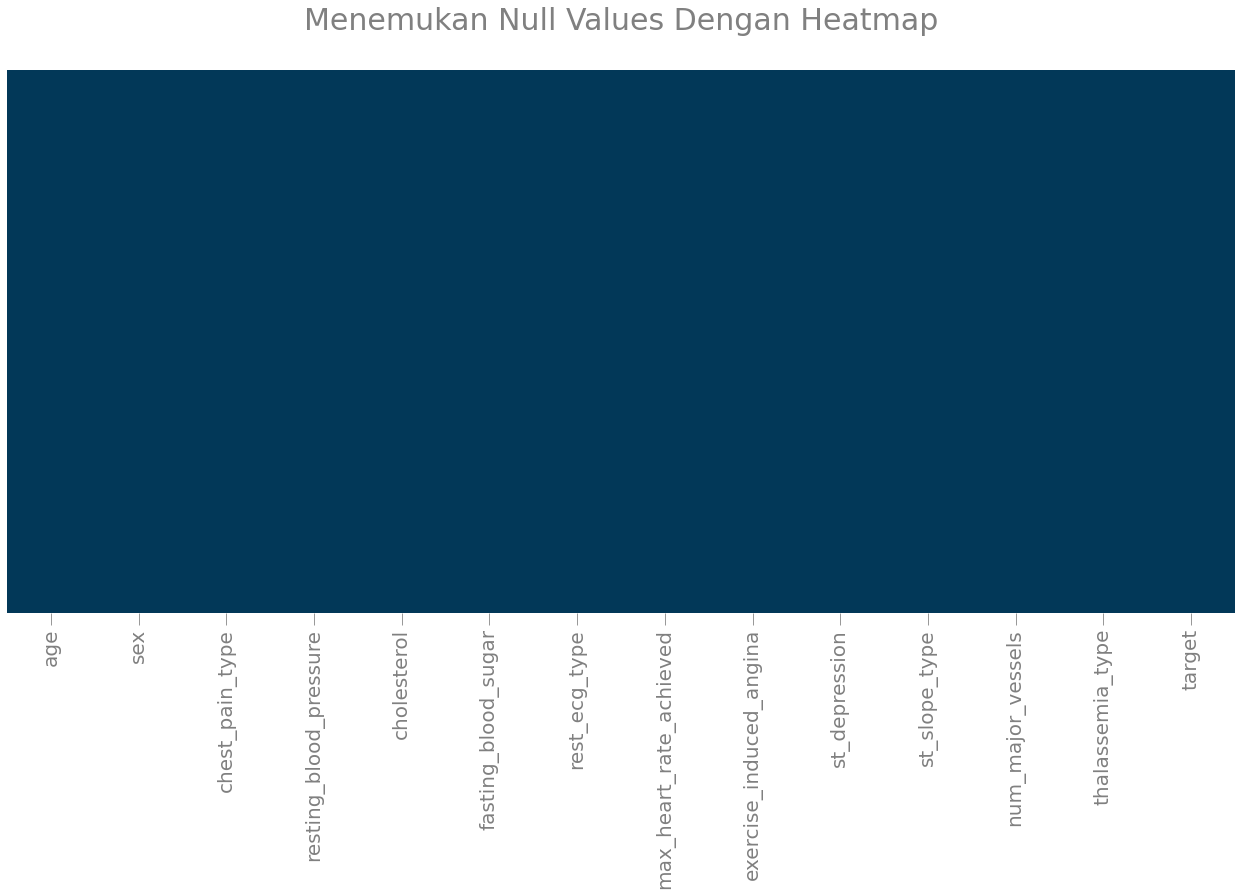

In [ ]:
# Visualisasi null values dengan heatmap
plt.figure(figsize=(22,10))

plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')

plt.title('Menemukan Null Values Dengan Heatmap\n',color='grey',size=30)

sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

**Rename kolom**

In [ ]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [ ]:
# Melihat kembali dataset setelah rename kolom
df.head(10)

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


**Matriks korelasi dan matriks visuaslisasi**

In [ ]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
Age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
Sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
Chest_pain,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
Resting_blood_pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
Fasting_blood_sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
ECG_results,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
Maximum_heart_rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
Exercise_induced_angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
ST_depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


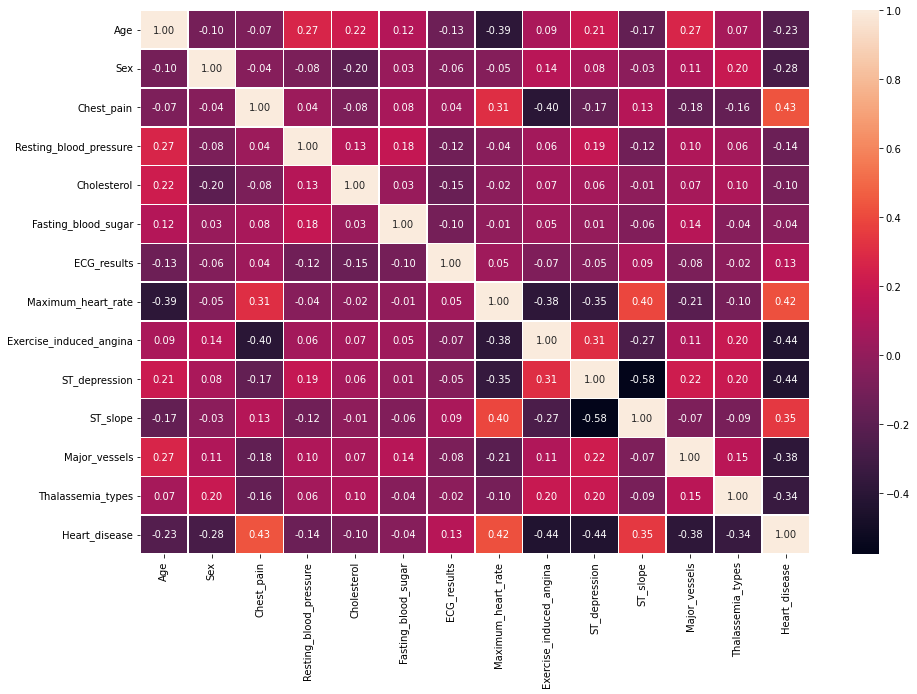

In [ ]:
# Membuat visualisasi matriks korelasi dengan heatmap
matriks_kor=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(matriks_kor,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

**Visualisasi dengan pandas-profiling**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 209 kB/s
     |████████████████████████████████| 102 kB 8.3 MB/s 
     |████████████████████████████████| 690 kB 34.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.9 MB 45.7 MB/s 
     |████████████████████████████████| 4.7 MB 38.2 MB/s 
     |████████████████████████████████| 296 kB 53.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=325000 sha256=90484f40fe136727f9bb4cbfbfe49ac514b0bda80c8608052ed5792736a525ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-cx23yj1x/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9c9306aa176b072b30569a853f1366ae990b2aee171c9c33b8619949ef3d7f76
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3

In [ ]:
# Import library pandas profiling
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Data pre-processing**

In [ ]:
# Mengubah nama kolom
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

Berdasarkan deskripsi data dengan pandas profiling, diketahui bahwa data memiliki 4 kolom kategorikal yaitu:

*   slope - st_slope_type
*   thal - thalassemia_type
*   cp - chest_pain_type
*   restecg - rest_ecg_type



Memunculkan nilai dari kolom kategorikal

In [ ]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [ ]:
df.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,52,1,asymptomatic,125,212,0,normal,168,0,1.0,upsloping,2,reversable defect,0
1,53,1,asymptomatic,140,203,1,left ventricular hypertrophy,155,1,3.1,downsloping,0,reversable defect,0
2,70,1,asymptomatic,145,174,0,normal,125,1,2.6,downsloping,0,reversable defect,0
3,61,1,asymptomatic,148,203,0,normal,161,0,0.0,upsloping,1,reversable defect,0
4,62,0,asymptomatic,138,294,1,normal,106,0,1.9,flat,3,normal,0


**One Hot Encoding dengan Pandas**
One hot encoding adalah salah satu cara pre-processing data dengan merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai 0 dan 1, dimana semua elemen akan berniai 0 kecuali satu elemen yang bernilai 1, yaitu elemen yang memiliki nilai kategori.

In [ ]:
# Menggunakan fitur one hot encode pada pandas dengan fungsi get_dummies()
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [ ]:
# menambahkan parameter fixed defect pada data
df_temp = data['thalassemia_type_fixed defect']

In [ ]:
data = pd.get_dummies(df, drop_first=True)

In [ ]:
data.head(5)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,0,1,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,0,1,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,0,1,1,0,1,0,0


Karena parameter fixed defect belum muncul pada one hot encode. diperlukan tambahan kolom untuk mendefinisikannya yaitu "thalassemia_type_fixed defect". Selanjutnya kolom 'thalassemia_type_nothing' dihilangkan karena hanya mengandung null values dan menggabungkan kolom "thalassemia_type_fixed defect" ke dataframe dengan fungsi concat().

In [ ]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,0,1,0,1,0,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,1,0,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,0,1,1,0,1,0,0,0


In [ ]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

**Pemodelan Machine Learning**

Pada kasus ini pemodelan machine learning yang digunakan adalah Logistic regression. Hal ini dikarenakan logistic regression cocok untuk dipakai pada data kategorikal dengan nilai 0 dan 1 untuk prediksi. Tahap pemodelan ini yaitu:

*   Mengumpulkan kolom
*   Split data
*   Normalisasi
*   Fitting model
*   Prediksi


1. Gather columns

In [ ]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [ ]:
# Membuat nilai untuk sumbu x
X = result.drop('target', axis = 1)

In [ ]:
# Membuat nilai untuk sumbu y
y =result['target']

2. Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Dataset akan dipecah ke dalam training dan test sets untuk membuat model machine learning.

*   Model akan mempelajari pattern dari training set
*   Model akan melakukan prediksi berdasarkan pattern dari test set



3. Normalisasi

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

4. Fitting model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logre = LogisticRegression()

In [ ]:
logre.fit(X_train,y_train)

LogisticRegression()

5. Prediksi model

In [ ]:
y_pred = logre.predict(X_test)

In [ ]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [ ]:
result  = pd.DataFrame(dic)

In [ ]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

Dari grafik diatas diketahui bahwa model dapat mengklasifikasikan tiap data dengan baik (hanya 0 dan 1) dan memiliki nilai test dan prediksi yang berdekatan.

6. Evaluasi model

In [ ]:
# Menentukan skor akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.848780487804878


**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        98
           1       0.85      0.87      0.86       107

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



**Confusion Matrix**

[[81 17]
 [14 93]]


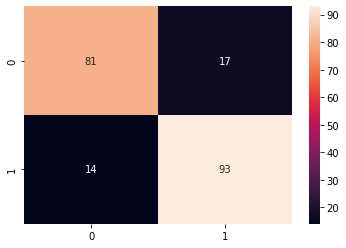

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**Kurva ROC**

Kurva ROC dibuat berdasarkan nilai yang telah didapatkan dari confusion matrix, yaitu false positive rate dan true positive rate. kurva ROC disini didapat dengan mem-plotkan semua nilai treshold yang dihasilkan model

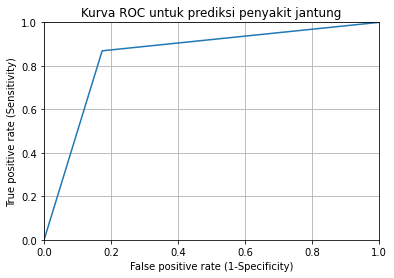

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Kurva ROC untuk prediksi penyakit jantung')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8478447453747855

**Hyperparameter tuning dengan Randomized Search CV**

In [ ]:
# Membuat grid hyperparameter untuk logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

Sekarang kita sudah mendapatkan set up dari grid hyperparameter untuk model logistic regression. Kemudian, kita dapat melakukan tuning menggunakan RandomizedSearchCV

In [ ]:
#Tuning model Logistic Regression
np.random.seed(42)

#Setup random hyperparameter search untuk Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=2)

# Mencocokkan random hyperparameter search untuk Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.1s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [ ]:
# Memeriksa parameter terbaik yang didapat dari RandomizedSearchCV
rs_log_reg.best_params_ 

{'solver': 'liblinear', 'C': 78.47599703514607}

In [ ]:
# Menemukan skor
rs_log_reg.score(X_test,y_test)

0.8390243902439024

**Hyperparameter tuning dengan GridSearchCV**

Kita akan mencoba improve lagi dengan GridSearchCV

In [ ]:
#Hyperparameter berbeda untuk logistic Regression Model

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":['liblinear']}

In [ ]:
# Tuning Logistic Regression
np.random.seed(42)

# Setup pencarian random hyperparameter untuk Logistic Regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                              cv=5,
                              verbose=2)

# Mencocokkan pencarian random hyperparameter untuk Logistic Regression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [ ]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,y_test)

0.8390243902439024

**Evaluasi model machine learning hasil tuning hyperparameter**

*   kurva ROC dan skor AUC
*   Confusion matrix
*   Classification report
*   precision
*   recall
*   skor f1

dan juga Cross Validation

Untuk membuat perbandingan dan evaluasi model, hal yang pertama dilakukan adalah melakukan prediksi




In [ ]:
# Membuat prediksi dengan model tuning
y_preds=gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



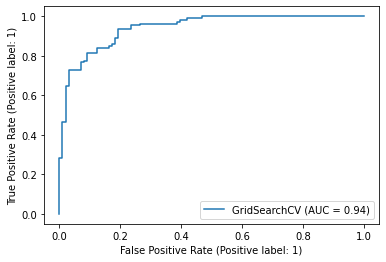

In [ ]:
# kurva ROC : mengukur bagaimana model berjalan dengan membandingkan nilai true positive rate dengan false positive rate
# kurva AUC lebih baik jika nilai mendekati 1, nilai AUC model adalah 0,94

plot_roc_curve(gs_log_reg,X_test,y_test)

[[81 17]
 [16 91]]


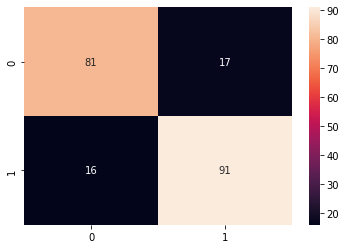

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

Sekarang kita sudah mempunya kurva ROC,confusion matrix, dan metrik AUC. Selanjutnya kita bisa mendapatkan classification report dengan cross-validated, precision, recall dan skor f1

In [ ]:
print(classification_report(y_test,y_preds))
# classification report ini hanya dihasilkan dari satu test split, bukan cross validation

# Precision mengindikasikan proposi identifikasi positif alias model prediksi kelas 1
# Recall mengindikasikan proporsi positif aktual yang sudah diklasifikasikan dengan benar
# F1 adalah kombinasi dari precision dan recall
# Support adalah jumlah sampel yang dikalkulasikan

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        98
           1       0.84      0.85      0.85       107

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



**Perhitungan matriks evaluasi dengan cross validation**

Kita akan memperhitungkan accuracy, precision, recall, dan f1-score dari model menggunakan cross-validation and selanjutnya kita akan menggunakan cross_val_score()

In [ ]:
# Memeriksa hyperparameter terbaik

gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [ ]:
# Membuat classifier baru dengan hyperparameter terbaik yang didapat

clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [ ]:
# Akurasi dari cross-validated

cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.84390244, 0.85853659, 0.85853659, 0.85853659, 0.8097561 ])

In [ ]:
# kita sudah evaluasi model dengan 5 split berbeda, jadi kita akan mengambil rata-rata untuk rerata akurasi

cv_acc=np.mean(cv_acc)
cv_acc

0.8458536585365855

In [ ]:
# precision dari cross-validated

cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.84761905, 0.83928571, 0.83333333, 0.84545455, 0.81904762])

In [ ]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8369480519480519

In [ ]:
#Cross-validated recall

cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84761905, 0.8952381 , 0.9047619 , 0.88571429, 0.81132075])

In [ ]:
cv_recall=np.mean(cv_recall)
cv_recall

0.8689308176100627

In [ ]:
#Cross-validated skor f1

cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1

array([0.84761905, 0.86635945, 0.86757991, 0.86511628, 0.81516588])

In [ ]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8523681118292947

In [ ]:
# Visualisasi metriks cross-validated
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1-Score":cv_f1
                        },index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.845854,0.836948,0.868931,0.852368


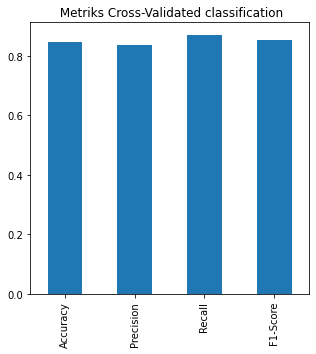

In [ ]:
cv_metrics.T.plot(kind="bar",figsize=(5,5),title=" Metriks Cross-Validated classification",legend=False);

**Pengaruh tiap atribut**

Pengaruh tiap atribut adalah atribut yang memiliki pengaruh paling signifikan dan bagaimana atribut tersebut berkontribusi terhadap data.

Untuk menemukan pengaruh tiap atribut dari model machine learning, dapat dilakukan dengan mencari kata kunci "(MODEL NAME) feature importance" dari internet

Untuk kasus ini, kita mencari untuk model logistic regression

In [ ]:
gs_log_reg.best_params_

{'C': 117.21022975334793, 'solver': 'liblinear'}

In [ ]:
# Mencocokkan contoh dari logistic regression

clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,52,1,asymptomatic,125,212,0,normal,168,0,1.0,upsloping,2,reversable defect,0
1,53,1,asymptomatic,140,203,1,left ventricular hypertrophy,155,1,3.1,downsloping,0,reversable defect,0
2,70,1,asymptomatic,145,174,0,normal,125,1,2.6,downsloping,0,reversable defect,0
3,61,1,asymptomatic,148,203,0,normal,161,0,0.0,upsloping,1,reversable defect,0
4,62,0,asymptomatic,138,294,1,normal,106,0,1.9,flat,3,normal,0
5,58,0,asymptomatic,100,248,0,left ventricular hypertrophy,122,0,1.0,flat,0,normal,1
6,58,1,asymptomatic,114,318,0,ST-T wave abnormality,140,0,4.4,downsloping,3,fixed defect,0
7,55,1,asymptomatic,160,289,0,left ventricular hypertrophy,145,1,0.8,flat,1,reversable defect,0
8,46,1,asymptomatic,120,249,0,left ventricular hypertrophy,144,0,0.8,upsloping,0,reversable defect,0
9,54,1,asymptomatic,122,286,0,left ventricular hypertrophy,116,1,3.2,flat,2,normal,0


In [ ]:
# Menemukan koefisien tiap atribut

clf.coef_

array([[-0.34223169, -0.93883029, -0.32026546, -0.29805225,  0.08362807,
         0.93434989, -0.79524921, -1.06178983, -1.63196207,  0.80339987,
         1.2386956 ,  0.86685166, -0.06415168,  0.55523308, -0.36280578,
         0.49549518,  0.7008021 , -0.60834873,  0.27687296]])

In [ ]:
# nilai koefisien menceritakan seberapa besar dan dengan jalan apa tiap atribut berkontribusi untuk memprediksi variabel target

feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.3422316919609602,
 'sex': -0.9388302938451656,
 'chest_pain_type': -0.32026546085290897,
 'resting_blood_pressure': -0.29805224798707103,
 'cholesterol': 0.0836280701613086,
 'fasting_blood_sugar': 0.934349886947624,
 'rest_ecg_type': -0.7952492063080545,
 'max_heart_rate_achieved': -1.061789833578482,
 'exercise_induced_angina': -1.631962072213881,
 'st_depression': 0.8033998671490992,
 'st_slope_type': 1.2386955979462928,
 'num_major_vessels': 0.8668516637194568,
 'thalassemia_type': -0.06415168388138327,
 'target': 0.5552330766211175}

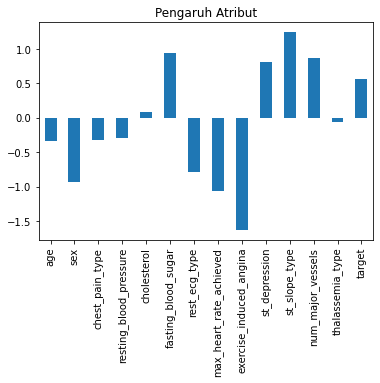

In [ ]:
# Visualisasi dari nilai koefisien tiap atribut

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Pengaruh Atribut")

Dari grafik batang diketahui bahwa atribut fasting_blood_sugar memiliki pengaruh paling positif sedangkan atribut exercise_induced_angina memiliki pengaruh paling negatif dari semua atribut

**Kesimpulan**



*   Area dibawah kurva ROC model sebelum tuning hyperparameter memiliki presentase 84.27 % yang berarti cukup memuaskan
*   Model memiliki prediksi dengan akurasi 84.88 % dan memiliki nilai spesifisitas (86.92 %) lebih tinggi dibandingkan sensitivitas (82.65 %)
*   Setelah tuning hyperparameter. akurasi model meningkat jadi 85.46 %
*   Atribut yang paling berpengaruh adalah fasting_blood_sugar (positif) dan exercise_induced_angina (negatif)



